In [498]:
import pandas as pd
import numpy as np
import matplotlib as mpl


In [499]:
df = pd.read_excel('HDDData.xlsx', sheet_name='Лист2')
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Дата на отказ,Брой операции при настъпване на отказа /в хиля...
2,NaN,2010-11-05 00:00:00,998
3,NaN,2020-02-25 00:00:00,547
4,NaN,2012-02-24 00:00:00,310


In [500]:
df = df.drop([0,1],axis=0)


In [501]:
del df[df.columns[0]]


In [502]:
df.columns=['Дата_на_отказ','Брой_операции']

In [503]:
import datetime
Launch_date = pd.to_datetime("2000-01-01",yearfirst = True)
df['Дата_на_отказ'] = pd.to_datetime(df['Дата_на_отказ'])
df['Месеци_живот'] = ((((df['Дата_на_отказ'] - Launch_date)/np.timedelta64(1, 'D')).astype(int) / 30.44)+1).astype(int)

In [504]:
df_sorted = df.sort_values('Дата_на_отказ')
df_sorted['Среден_живот'] = 0.0
a = df_sorted.shape[0]
df_sorted.reset_index(inplace = True)
for index in range(df_sorted.shape[0]):
    df_sorted.iloc[index,df_sorted.columns.get_loc('Среден_живот')] = ((df_sorted[:index]['Месеци_живот'].sum() + (a-index-1)*df_sorted.iloc[index,df_sorted.columns.get_loc('Месеци_живот')])/a).round().astype(int)
df_sorted

,index,Дата_на_отказ,Брой_операции,Месеци_живот,Среден_живот
0,758,2000-01-08,764,1,1.0
1,913,2000-01-08,1032,1,1.0
2,855,2000-01-31,1094,1,1.0
3,126,2000-02-09,747,2,2.0
4,462,2000-02-17,890,2,2.0
...,...,...,...,...,...
1044,811,2023-11-27,266,287,146.0
1045,890,2023-12-20,1039,288,146.0
1046,204,2023-12-21,153,288,146.0
1047,423,2023-12-27,1094,288,146.0


<Axes: title={'center': 'Среден живот'}, xlabel='Дата_на_отказ'>

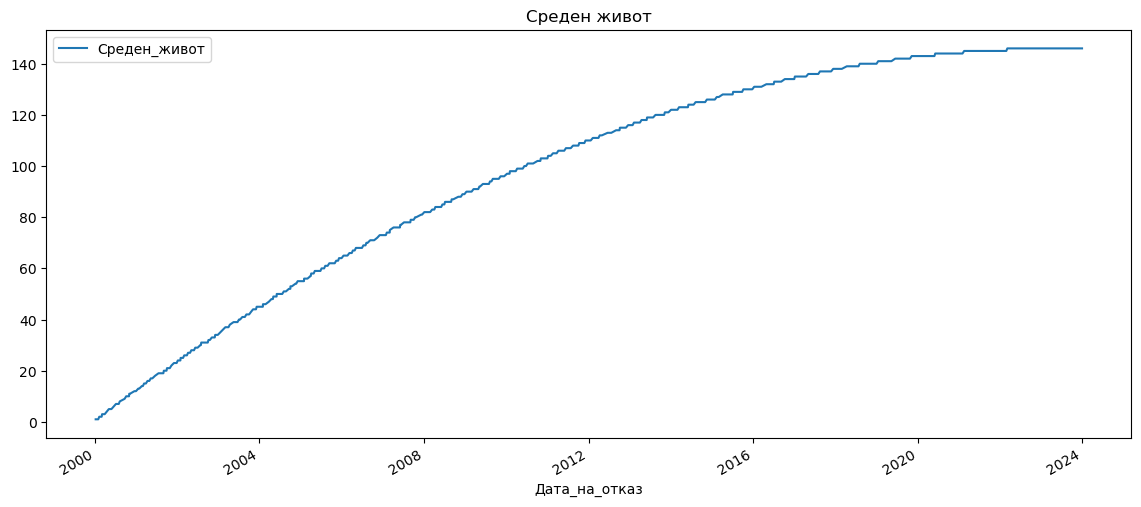

In [505]:
df_sorted.plot.line('Дата_на_отказ', 'Среден_живот', figsize = (14,6), title = 'Среден живот')

In [506]:
df_sorted['Дял_отказали_дискове'] = range(1,(df_sorted['Дата_на_отказ'].shape[0]+1))
df_sorted['Дял_отказали_дискове'] = df_sorted['Дял_отказали_дискове']/1049*100 #в проценти

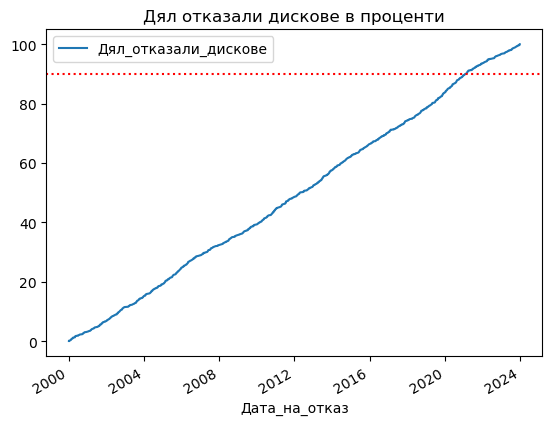

In [507]:
b = df_sorted.plot.line('Дата_на_отказ','Дял_отказали_дискове', title = 'Дял отказали дискове в проценти', )
b.axhline(90, color = 'red', linestyle='dotted')

In [508]:
df_sorted['Среден_брой_операции'] = 0.0
for index in range(df_sorted.shape[0]):
    df_sorted.iloc[index,df_sorted.columns.get_loc('Среден_брой_операции')] = round(df_sorted[:(index+1)]['Брой_операции'].sum()/(index+1))
df_sorted

,index,Дата_на_отказ,Брой_операции,Месеци_живот,Среден_живот,Дял_отказали_дискове,Среден_брой_операции
0,758,2000-01-08,764,1,1.0,0.095329,764.0
1,913,2000-01-08,1032,1,1.0,0.190658,898.0
2,855,2000-01-31,1094,1,1.0,0.285987,963.0
3,126,2000-02-09,747,2,2.0,0.381316,909.0
4,462,2000-02-17,890,2,2.0,0.476644,905.0
...,...,...,...,...,...,...,...
1044,811,2023-11-27,266,287,146.0,99.618684,804.0
1045,890,2023-12-20,1039,288,146.0,99.714013,805.0
1046,204,2023-12-21,153,288,146.0,99.809342,804.0
1047,423,2023-12-27,1094,288,146.0,99.904671,804.0


<Axes: title={'center': 'Среден брой операции при отказ'}, xlabel='Дата_на_отказ'>

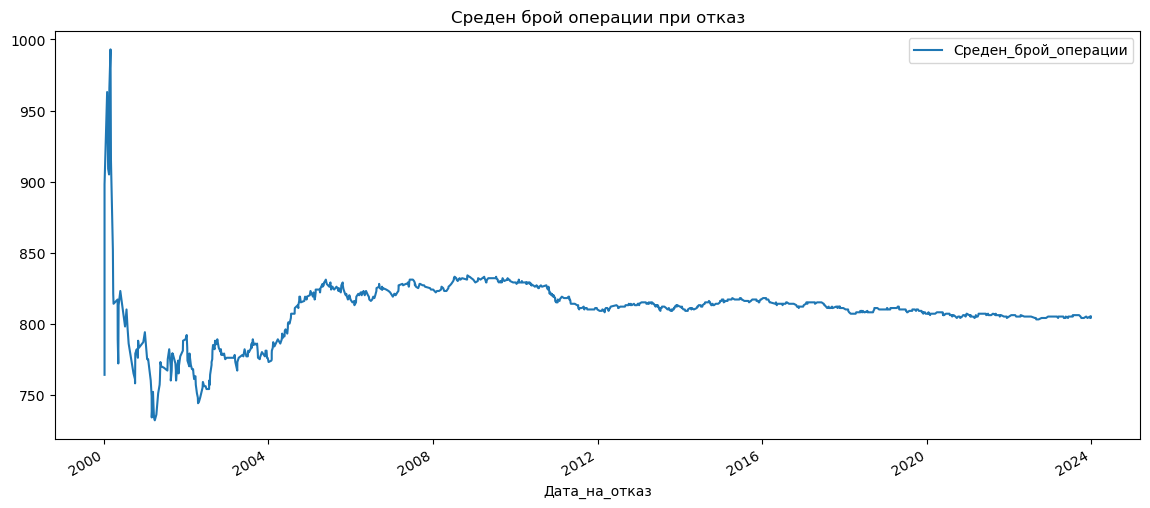

In [520]:
df_sorted.plot.line('Дата_на_отказ', 'Среден_брой_операции', figsize=(14,6), title = 'Среден брой операции при отказ')